In [5]:
#Part 3 Question 1 - Solution Code
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport
import os

file_path = "/Users/harshdave/Downloads/red_wine.csv"  # Path where the dataset is located in my Github Repository
df = pd.read_csv(file_path)

categorical_columns = df.select_dtypes(include=['object']).columns  # Identify categorical or discrete attributes

profile = ProfileReport(df, explorative=True)

profile.to_notebook_iframe()
profile_output = "Red_Wine_Profile_Report.html"
profile.to_file(profile_output)
numeric_stats = df.describe().T[['min', 'max', 'mean', '50%', 'std']]  # Compute Statistics for Numeric Columns ( for median calculation we use 50%, as it is the mid-value)
numeric_stats.rename(columns={'50%': 'median'}, inplace=True)
print("\n Numeric Column Summary:")
print(numeric_stats)
if os.path.exists(profile_output):
    from IPython.display import FileLink
    print("Click below to download the profile report:")
    display(FileLink(profile_output))
else:
    print("Profile report was not generated correctly!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████| 4/4 [00:00<00:00, 21050.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


 Numeric Column Summary:
              min   max       mean  median       std
citric acid  0.00   1.0   0.324676    0.33  0.175103
sulphates    0.25   2.0   0.588161    0.57  0.188478
alcohol      8.00  12.8  10.776883   10.80  1.092562
Click below to download the profile report:


/Users/harshdave/Red_Wine_Profile_Report.html

In [7]:
#Part 3 Question 2 - Solution Code

import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = "/Users/harshdave/Downloads/red_wine.csv"  # Path where the dataset is located in my Github Repository
data = pd.read_csv(file_path)


label_encoder = LabelEncoder()
data["type"] = label_encoder.fit_transform(data["type"])  # Convert "low" and "high" to 0 and 1 for calculation


X = data.drop(columns=["type"])
y = data["type"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


majority_class = y.mode()[0]
baseline_accuracy = (y == majority_class).mean()*100
baseline_auc = 0.5  

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"Baseline AUC: {baseline_auc}")


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}


for model_name, model in models.items():
    print(f"\nModel: {model_name}")
    
    y_pred = cross_val_predict(model, X_scaled, y, cv=10, method='predict')
    y_prob = cross_val_predict(model, X_scaled, y, cv=10, method='predict_proba')
    
    accuracy = accuracy_score(y, y_pred)*100
    auc = roc_auc_score(y, y_prob[:, 1]) 
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC: {auc}")

Baseline Accuracy: 52.89
Baseline AUC: 0.5

Model: Logistic Regression
Accuracy: 79.51
AUC: 0.8709470937246117

Model: Naive Bayes
Accuracy: 82.14
AUC: 0.882481104901647

Model: Decision Tree
Accuracy: 76.36
AUC: 0.7604138457372166

Model: SVM-Linear
Accuracy: 78.98
AUC: 0.8715010216893573

Model: SVM-RBF
Accuracy: 82.31
AUC: 0.9108299071862921

Model: Random Forest
Accuracy: 80.56
AUC: 0.8703808562495383


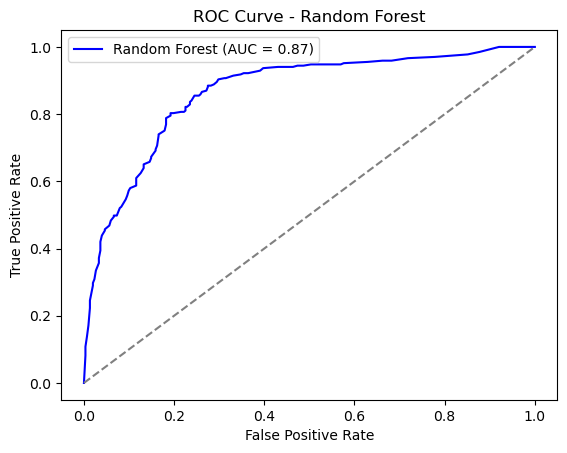

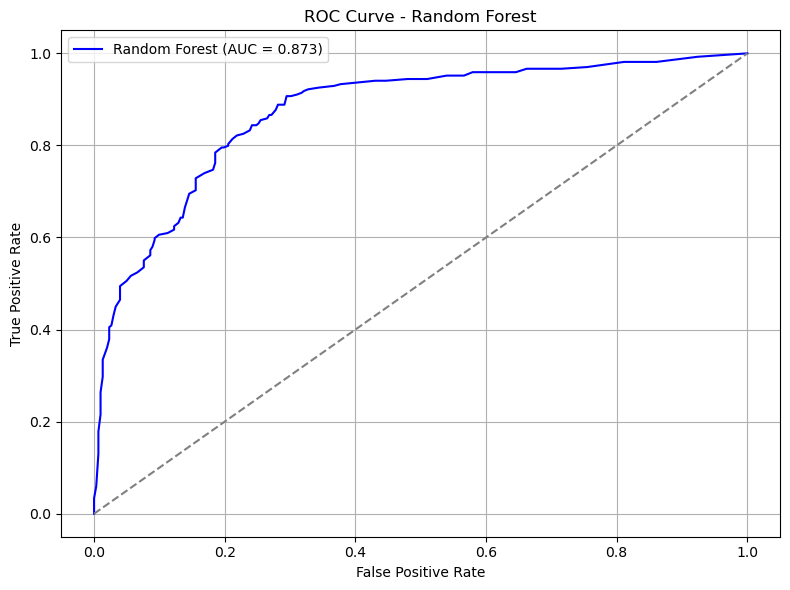

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Show plots inline
%matplotlib inline

# Load data
file_path = "/Users/harshdave/Downloads/red_wine.csv"  
data = pd.read_csv(file_path)

# Encode 'type'
label_encoder = LabelEncoder()
data["type"] = label_encoder.fit_transform(data["type"])  

# Features and target
X = data.drop(columns=["type"])
y = data["type"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest with cross-validated predicted probabilities
rf_model = RandomForestClassifier()
y_prob_rf = cross_val_predict(rf_model, X_scaled, y, cv=10, method='predict_proba')

# ROC curve
fpr, tpr, _ = roc_curve(y, y_prob_rf[:, 1])
roc_auc = roc_auc_score(y, y_prob_rf[:, 1])

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
file_path = "/Users/harshdave/Downloads/white_wine.csv"
df = pd.read_csv(file_path)

print(df.head())

X = df.drop(columns=['type'])  
y = df['type']  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
y_pred_prob = svm_rbf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)*100
auc_score = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {auc_score:.4f}")

   citric acid  sulphates  alcohol type
0         0.24       0.52      9.4  low
1         0.49       0.56      9.4  low
2         0.66       0.73     10.0  low
3         0.32       0.77     10.0  low
4         0.38       0.82     10.0  low
Accuracy: 81.25
AUC Score: 0.9455
